# The Sparks Foundation

## Task1 - Prediction using Supervised ML 
- Predict the percentage of an student based on the no. of study hours. 
- This is a simple linear  regression task as it involves just 2 variables.
- You can use R, Python, SAS Enterprise Miner or any other tool  
- Data can be found at http://bit.ly/w-data -> save as **scores_students.txt**
- What will be predicted score if a student studies for 9.25 hrs/ day? 

### Importing the libraries

In [23]:
import pandas as pd
from scipy import stats
import statistics as stat
import matplotlib.pyplot as plt


In [24]:
# loading the file 
df = pd.read_csv("scores_students.txt")
df

Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86

In [25]:
# before ploting, let´s sorted by hours
df.sort_values(by="Hours",inplace=True)

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

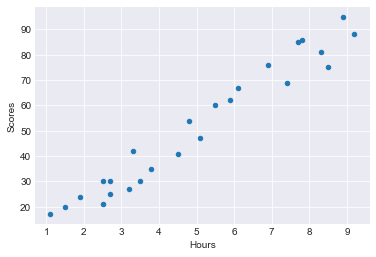

In [26]:
# let´s see the plot to have our first analysis
df.plot.scatter("Hours","Scores") 

**Observing the first plot** 

Checking the plot above we can see the most hours studying, highest scores.
So, we can say that the hours are directly linked to the scores.

### Let´s check the relationship between the Hours(x) and Scores(y)

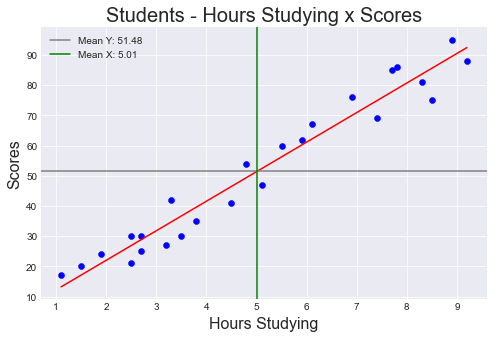

In [27]:
# Now let´s draw a linear regression to check how well the data fits on the linear regression

# Here we need to import some modules like scipy and stats 
%matplotlib inline
fig, ax = plt.subplots(figsize=(8,5))
plt.style.use("seaborn-darkgrid")

x = df["Hours"]
y = df["Scores"]

# drawing the data again using matplotlib, so we can customize the plot
ax.scatter(x,y, color="b",marker='o',linewidths=0.5)

# executing the linregress to get some values related to the data we have
slope, intercept, r, p, std_err = stats.linregress(x, y)


def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
plt.plot(x, mymodel,color='r')

ax.set_title('Students - Hours Studying x Scores',fontsize=20)
ax.set_xlabel('Hours Studying',fontsize=16)
ax.set_ylabel('Scores',fontsize=16)

# insert a straight line horizontaly and verticaly(meanx and meany)
plt.axhline(y=avgy, color='gray', linestyle='-',label=f'Mean Y: {avgy:.2f}')
plt.axvline(x=avgx, color='g', linestyle='-',label=f'Mean X: {avgx:.2f}')
plt.legend()

plt.show()

### Let´s calculate some information about the linear regression related to our data

In [43]:
# What is the Average Hours of studying    
avgx = stat.mean(x)
print(f"The average Hours of studying is: {avgx:.2f}")

# What is the Average Scores 
avgy = stat.mean(y)
print(f"The average Scores is: {avgy:.2f}")

# let´s check if the slope are Positive or Negative
if slope > 0:
    line = "Positive"
elif slope < 0:
    line = "Negative"
else:
    line = ""
print(f"The slope(m) is {slope} ---> {line}")

print(f"The intercept(b) is {intercept} ---> indicate in which point of axis Y the line will cross")
print(f"R: {r}")
print(f"R2: {r**2} ---> indicate how well the data fits on the linear regression")
print(f"p-value: {p} ---> indicate how confidence is the value of R2")


The average Hours of studying is: 5.01
The average Scores is: 51.48
The slope(m) is 9.77580339078747 ---> Positive
The intercept(b) is 2.483673405373203 ---> indicate in which point of axis Y the line will cross
R: 0.9761906560220885
R2: 0.9529481969048356 ---> indicate how well the data fits on the linear regression
p-value: 9.132624467459785e-17 ---> indicate how confidence is the value of R2


In [36]:
# we can use the describe and corr from pandas to confirm some values
df.describe()

Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

In [35]:
df.corr()

Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000

## Prediction
**What will be predicted score if a student studies for 9.25 hrs/ day?**

In [32]:
# Using the same funtion above(myfunc) let´s check the prediction score if a student studies 9.25 hours
hour_predict = 9.25
score_predict = myfunc(hour_predict)
print(f"If a student studies {hour_predict} hours per day, the predict Scores is {score_predict:.2f}") 

If a student studies 9.25 hours per day, the predict Scores is 92.91
